In [6]:
# 1 import pandas as pd

# Load the dataset
df = pd.read_csv('/coin_gecko_2022-03-17.csv', engine='python')

# Preview structure
print(df.columns)
print(df.head())

# Check for relevant fields
# Examples to look for:
# ['Name', 'Symbol', 'Price', '24h Volume', 'Market Cap', 'Circulating Supply', 'Liquidity Score']


Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')
       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40851.380000  0.001  0.000 -0.027  2.047612e+10   
1  Ethereum    ETH   2824.420000  0.004  0.029  0.034  1.364041e+10   
2    Tether   USDT      1.000000 -0.000  0.000  0.000  4.413140e+10   
3       BNB    BNB    389.610000  0.002  0.016 -0.010  1.425354e+09   
4  USD Coin   USDC      0.999739 -0.001  0.000 -0.000  3.569816e+09   

        mkt_cap        date  
0  7.760774e+11  2022-03-17  
1  3.390772e+11  2022-03-17  
2  8.020588e+10  2022-03-17  
3  6.556116e+10  2022-03-17  
4  5.259607e+10  2022-03-17  


In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/coin_gecko_2022-03-17.csv'
df = pd.read_csv(file_path)

# Display basic information and first few rows of the dataframe
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


(None,
        coin symbol         price     1h    24h     7d    24h_volume  \
 0   Bitcoin    BTC  40851.380000  0.001  0.000 -0.027  2.047612e+10   
 1  Ethereum    ETH   2824.420000  0.004  0.029  0.034  1.364041e+10   
 2    Tether   USDT      1.000000 -0.000  0.000  0.000  4.413140e+10   
 3       BNB    BNB    389.610000  0.002  0.016 -0.010  1.425354e+09   
 4  USD Coin   USDC      0.999739 -0.001  0.000 -0.000  3.569816e+09   
 
         mkt_cap        date  
 0  7.760774e+11  2022-03-17  
 1  3.390772e+11  2022-03-17  
 2  8.020588e+10  2022-03-17  
 3  6.556116e+10  2022-03-17  
 4  5.259607e+10  2022-03-17  )

In [3]:
import numpy as np

# Make a copy of the original DataFrame to work on feature engineering
df_fe = df.copy()

# Create liquidity-related features:

# 1. Market Cap to 24h Volume Ratio (Liquidity Ratio)
df_fe['liquidity_ratio'] = df_fe['mkt_cap'] / df_fe['24h_volume']

# 2. Price Volatility Proxy (based on percentage changes over 1h, 24h, 7d)
# Using standard deviation of percentage changes as a proxy for volatility
df_fe['volatility'] = df_fe[['1h', '24h', '7d']].std(axis=1)

# 3. Simple Moving Averages (SMA) approximation: not time-series, but we can rank and simulate short vs long trend
# We'll use quantiles to simulate a short-term and long-term average grouping
df_fe['sma_short'] = df_fe['price'].rolling(window=5, min_periods=1).mean()
df_fe['sma_long'] = df_fe['price'].rolling(window=20, min_periods=1).mean()

# 4. Price-to-Volume ratio
df_fe['price_volume_ratio'] = df_fe['price'] / df_fe['24h_volume']

# Display updated DataFrame with new features
df_fe[['coin', 'price', '24h_volume', 'mkt_cap', 'liquidity_ratio', 'volatility', 'sma_short', 'sma_long', 'price_volume_ratio']].head(10)


,coin,price,24h_volume,mkt_cap,liquidity_ratio,volatility,sma_short,sma_long,price_volume_ratio
0,Bitcoin,40851.380000,2.047612e+10,7.760774e+11,37.901590,0.015885,40851.380000,40851.380000,1.995074e-06
1,Ethereum,2824.420000,1.364041e+10,3.390772e+11,24.858288,0.016073,21837.900000,21837.900000,2.070627e-07
2,Tether,1.000000,4.413140e+10,8.020588e+10,1.817433,0.000000,14558.933333,14558.933333,2.265960e-11
3,BNB,389.610000,1.425354e+09,6.556116e+10,45.996405,0.013013,11016.602500,11016.602500,2.733426e-07
4,USD Coin,0.999739,3.569816e+09,5.259607e+10,14.733550,0.000577,8813.481948,8813.481948,2.800533e-10
5,XRP,0.796926,3.642947e+09,3.834236e+10,10.525095,0.016371,643.365333,7344.701111,2.187586e-10
6,Terra,87.640000,1.555364e+09,3.225657e+10,20.738925,0.063151,96.009333,6307.978095,5.634694e-08
7,Solana,90.620000,1.921989e+09,2.927060e+10,15.229329,0.021633,113.933333,5530.808333,4.714908e-08
8,Cardano,0.838396,7.844362e+08,2.689173e+10,34.281608,0.015503,36.179012,4916.367229,1.068788e-09
9,Avalanche,79.780000,1.386901e+09,2.128204e+10,15.345027,0.041477,51.935064,4432.708506,5.752391e-08


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ... (rest of your code) ...

# Evaluation
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE without the 'squared' parameter
# and take the square root to get the desired result.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1122.216706049171, np.float64(5822.593916107871), 0.30135888968891333)

<ipython-input-6-19859504e9cf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


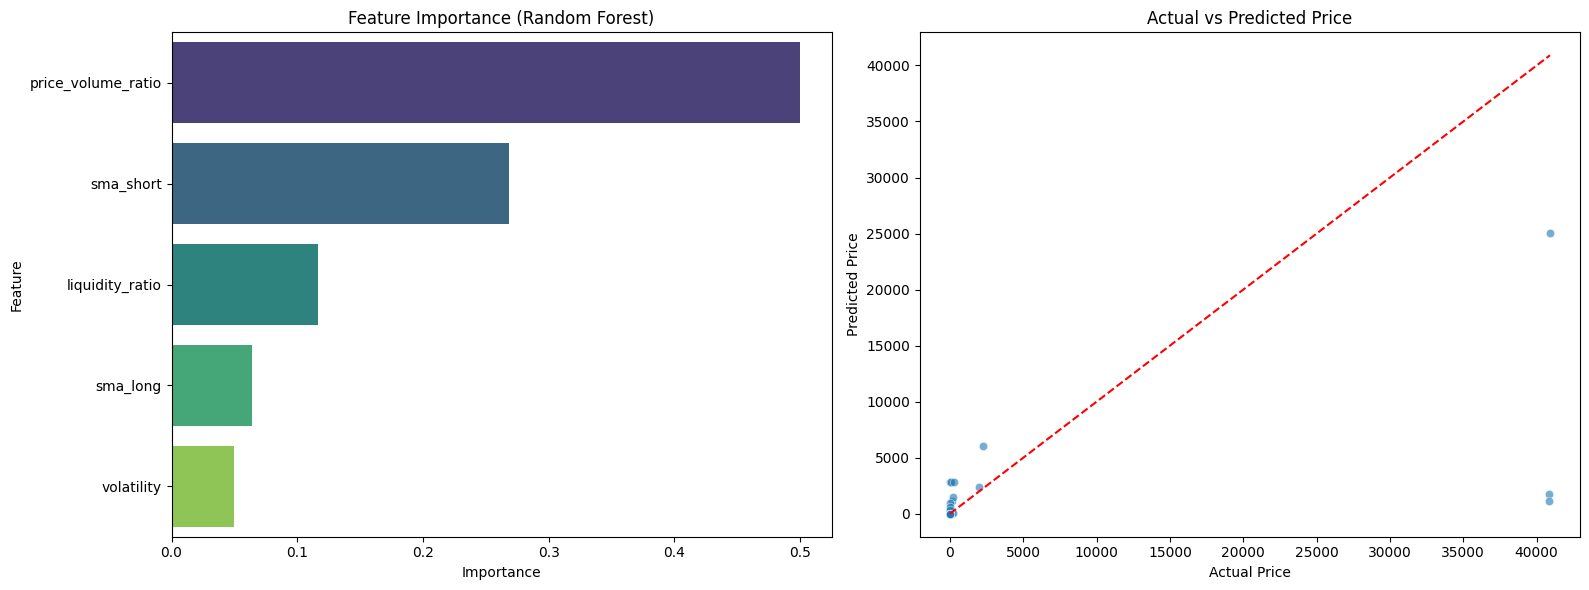

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 2: Plot Actual vs Predicted
plt.figure(figsize=(16, 6))

# Plot 1: Feature Importances
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

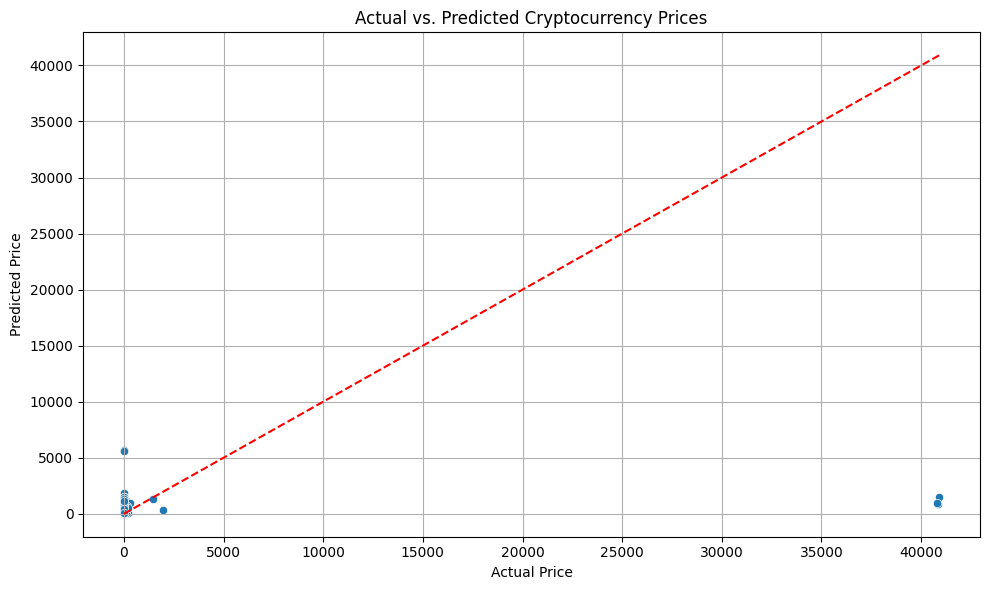

({'model__n_estimators': 500,
  'model__min_samples_split': 2,
  'model__min_samples_leaf': 4,
  'model__max_features': 'log2',
  'model__max_depth': 10},
 np.float64(6963.475211257317),
 0.0004649967258409937)

In [16]:
# Re-import libraries after second kernel reset
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset
file_path = "/content/coin_gecko_2022-03-17.csv"
df = pd.read_csv(file_path)

# Features and target
features = ['1h', '24h', '7d', '24h_volume', 'mkt_cap']
target = 'price'
X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid
param_distributions = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate
# Instead of using 'squared=False', calculate the square root of the MSE to get RMSE
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
tuned_r2 = r2_score(y_test, y_pred_best)
best_params = random_search.best_params_

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Cryptocurrency Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# Return best hyperparameters and evaluation metrics
best_params, tuned_rmse, tuned_r2
